In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

from pyConstants import *
from SrConstants import *

In [2]:
def accel_onresonance(intensity):
	sat_param = intensity/redIsat
	acc = (hbar*kVecRed*redGamma/(2*mSr88))*sat_param/(1+sat_param)
	return acc 

def laguerre_gauss_int(rad,power,waistRad):
    intensity = (2*power/(np.pi*waistRad**2))*np.exp(-2*rad**2/waistRad**2)
    return intensity

def percentagePowerInside(rad,waistRad):
    return 1-np.exp(-2*rad**2/waistRad**2)

Power is 1 mW, beam rad is 7 mm, lines: 200


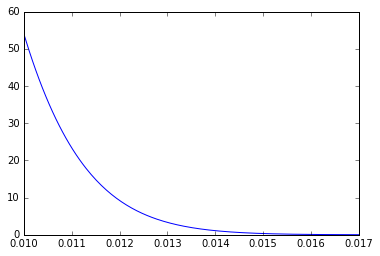

In [3]:
powerLaser = 1 # mW
beam_radius = 7 # mm
number_lines = 200
positions = np.linspace(10e-3,17e-3,200)
intensities = [laguerre_gauss_int(pos,powerLaser*1e-3,beam_radius*1e-3)/number_lines for pos in positions]
accelerations = [accel_onresonance(inten) for inten in intensities]
plt.plot(positions,accelerations)
print("Power is %.i mW, beam rad is %.i mm, lines: %.i"%(powerLaser,beam_radius,number_lines))

In [4]:
print("Max acceleration: ",hbar*kVecRed*redGamma/(2*mSr88)," m/s^2")

Max acceleration:  1528.986475410838  m/s^2


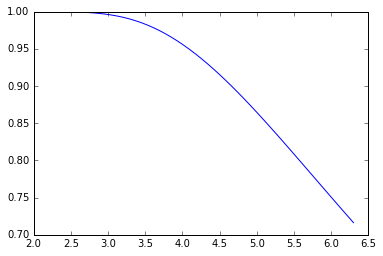

In [5]:
radiusWaveplate = 5 #mm
radiiBeam = np.linspace(2.3,6.3) #mm
fractionsPowerIn = [percentagePowerInside(radiusWaveplate,rB) for rB in radiiBeam]
plt.plot(radiiBeam,fractionsPowerIn)
plt.show()

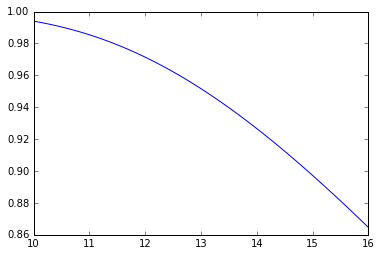

In [10]:
radiusViewport = 16 #mm
radiiBeam = np.linspace(10,16) #mm
fractionsPowerIn = [percentagePowerInside(radiusViewport,rB) for rB in radiiBeam]
plt.plot(radiiBeam,fractionsPowerIn)
plt.show()

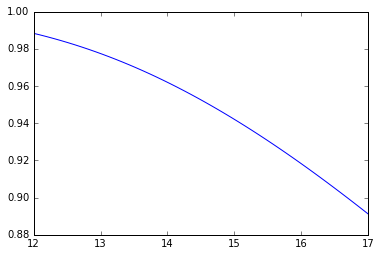

In [7]:
radiusViewport = 17.9 #mm
radiiBeam = np.linspace(12,17) #mm
fractionsPowerIn = [percentagePowerInside(radiusViewport,rB) for rB in radiiBeam]
plt.plot(radiiBeam,fractionsPowerIn)
plt.show()

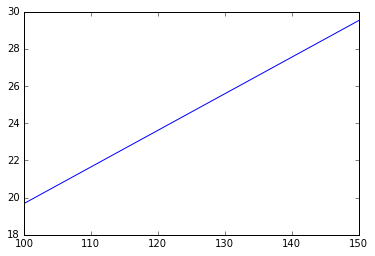

In [8]:
TLfiberNA = 0.12
focalLengths = np.linspace(100,150)
beamDiamSK = [2*f*TLfiberNA*0.82 for f in focalLengths] #according to the formula in Schafter+Kirchhoff tutorial p. 31
plt.plot(focalLengths,beamDiamSK)
plt.show()